In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import optuna
from optuna.samplers import TPESampler
from optuna.integration import CatBoostPruningCallback

In [44]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.shape, test.shape

((1117957, 22), (745305, 21))

In [5]:
train.head().T

0     1     2      3      4
id                               0.000  1.00  2.00  3.000  4.000
MonsoonIntensity                 5.000  6.00  6.00  3.000  5.000
TopographyDrainage               8.000  7.00  5.00  4.000  3.000
RiverManagement                  5.000  4.00  6.00  6.000  2.000
Deforestation                    8.000  4.00  7.00  5.000  6.000
Urbanization                     6.000  8.00  3.00  4.000  4.000
ClimateChange                    4.000  8.00  7.00  8.000  4.000
DamsQuality                      4.000  3.00  1.00  4.000  3.000
Siltation                        3.000  5.00  5.00  7.000  3.000
AgriculturalPractices            3.000  4.00  4.00  6.000  3.000
Encroachments                    4.000  6.00  5.00  8.000  3.000
IneffectiveDisasterPreparedness  2.000  9.00  6.00  5.000  5.000
DrainageSystems                  5.000  7.00  7.00  2.000  2.000
CoastalVulnerability             3.000  2.00  3.00  4.000  2.000
Landslides                       3.000  0.00  7.00  7.000  6.000
Watersheds                       5.000  3.00  5.00  4.000  6.000
DeterioratingInfrastructure      4.000  5.00  6.00  4.000  4.000
PopulationScore                  7.000  3.00  8.00  6.000  1.000
WetlandLoss                      5.000  3.00  2.00  5.000  2.000
InadequatePlanning               7.000  4.00  3.00  7.000  3.000
PoliticalFactors                 3.000  3.00  3.00  5.000  5.000
FloodProbability                 0.445  0.45  0.53  0.535  0.415

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [8]:
train.describe().T

count           mean            std  \
id                               1117957.0  558978.000000  322726.531784   
MonsoonIntensity                 1117957.0       4.921450       2.056387   
TopographyDrainage               1117957.0       4.926671       2.093879   
RiverManagement                  1117957.0       4.955322       2.072186   
Deforestation                    1117957.0       4.942240       2.051689   
Urbanization                     1117957.0       4.942517       2.083391   
ClimateChange                    1117957.0       4.934093       2.057742   
DamsQuality                      1117957.0       4.955878       2.083063   
Siltation                        1117957.0       4.927791       2.065992   
AgriculturalPractices            1117957.0       4.942619       2.068545   
Encroachments                    1117957.0       4.949230       2.083324   
IneffectiveDisasterPreparedness  1117957.0       4.945239       2.078141   
DrainageSystems                  1117957.0       4.946893       2.072333   
CoastalVulnerability             1117957.0       4.953999       2.088899   
Landslides                       1117957.0       4.931376       2.078287   
Watersheds                       1117957.0       4.929032       2.082395   
DeterioratingInfrastructure      1117957.0       4.925907       2.064813   
PopulationScore                  1117957.0       4.927520       2.074176   
WetlandLoss                      1117957.0       4.950859       2.068696   
InadequatePlanning               1117957.0       4.940587       2.081123   
PoliticalFactors                 1117957.0       4.939004       2.090350   
FloodProbability                 1117957.0       0.504480       0.051026   

                                   min        25%         50%        75%  \
id                               0.000  279489.00  558978.000  838467.00   
MonsoonIntensity                 0.000       3.00       5.000       6.00   
TopographyDrainage               0.000       3.00       5.000       6.00   
RiverManagement                  0.000       4.00       5.000       6.00   
Deforestation                    0.000       4.00       5.000       6.00   
Urbanization                     0.000       3.00       5.000       6.00   
ClimateChange                    0.000       3.00       5.000       6.00   
DamsQuality                      0.000       4.00       5.000       6.00   
Siltation                        0.000       3.00       5.000       6.00   
AgriculturalPractices            0.000       3.00       5.000       6.00   
Encroachments                    0.000       4.00       5.000       6.00   
IneffectiveDisasterPreparedness  0.000       3.00       5.000       6.00   
DrainageSystems                  0.000       4.00       5.000       6.00   
CoastalVulnerability             0.000       3.00       5.000       6.00   
Landslides                       0.000       3.00       5.000       6.00   
Watersheds                       0.000       3.00       5.000       6.00   
DeterioratingInfrastructure      0.000       3.00       5.000       6.00   
PopulationScore                  0.000       3.00       5.000       6.00   
WetlandLoss                      0.000       4.00       5.000       6.00   
InadequatePlanning               0.000       3.00       5.000       6.00   
PoliticalFactors                 0.000       3.00       5.000       6.00   
FloodProbability                 0.285       0.47       0.505       0.54   

                                         max  
id                               1117956.000  
MonsoonIntensity                      16.000  
TopographyDrainage                    18.000  
RiverManagement                       16.000  
Deforestation                         17.000  
Urbanization                          17.000  
ClimateChange                         17.000  
DamsQuality                           16.000  
Siltation                             16.000  
AgriculturalPractices                 16.000  
Encroachments         

In [9]:
train.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [10]:
test.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'MonsoonIntensity'}>,
        <Axes: title={'center': 'TopographyDrainage'}>,
        <Axes: title={'center': 'RiverManagement'}>,
        <Axes: title={'center': 'Deforestation'}>],
       [<Axes: title={'center': 'Urbanization'}>,
        <Axes: title={'center': 'ClimateChange'}>,
        <Axes: title={'center': 'DamsQuality'}>,
        <Axes: title={'center': 'Siltation'}>,
        <Axes: title={'center': 'AgriculturalPractices'}>],
       [<Axes: title={'center': 'Encroachments'}>,
        <Axes: title={'center': 'IneffectiveDisasterPreparedness'}>,
        <Axes: title={'center': 'DrainageSystems'}>,
        <Axes: title={'center': 'CoastalVulnerability'}>,
        <Axes: title={'center': 'Landslides'}>],
       [<Axes: title={'center': 'Watersheds'}>,
        <Axes: title={'center': 'DeterioratingInfrastructure'}>,
        <Axes: title={'center': 'PopulationScore'}>,
        <Axes: title={'center': 'WetlandLo

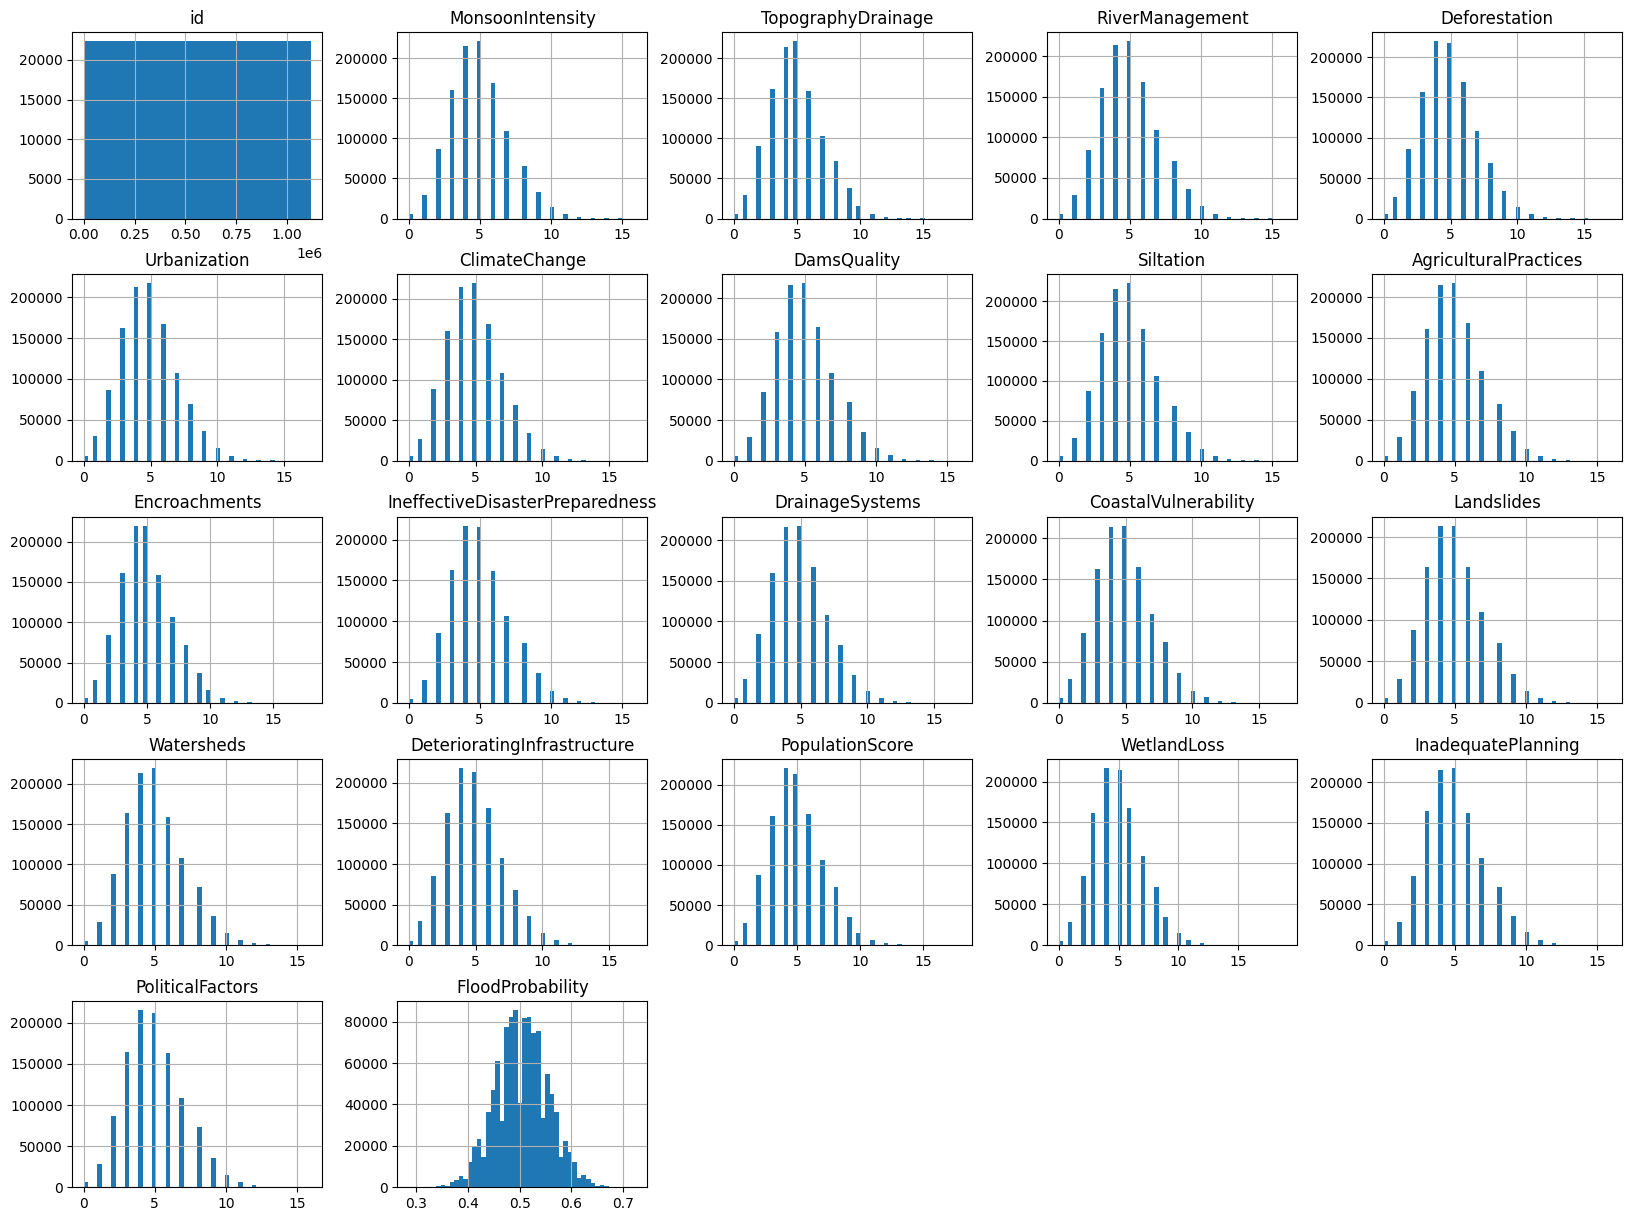

In [11]:
train.hist(bins=50, figsize=(20, 15))

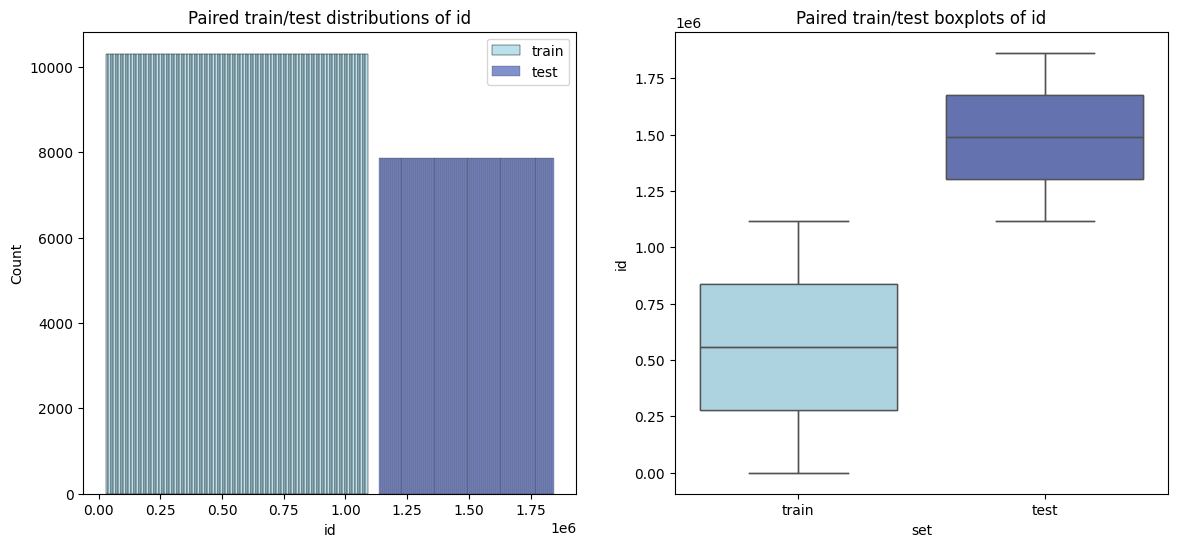

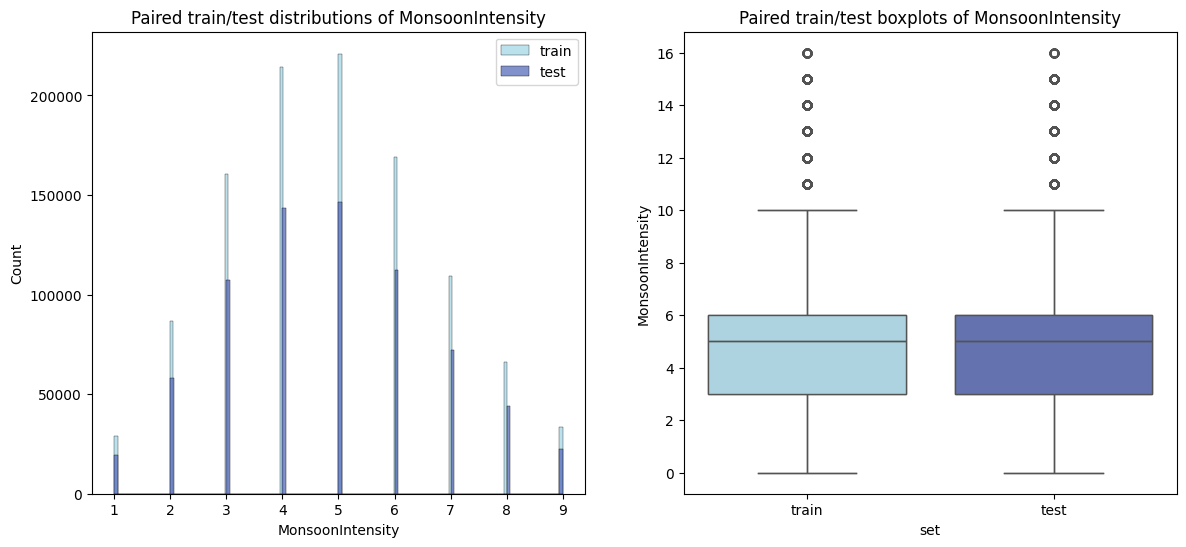

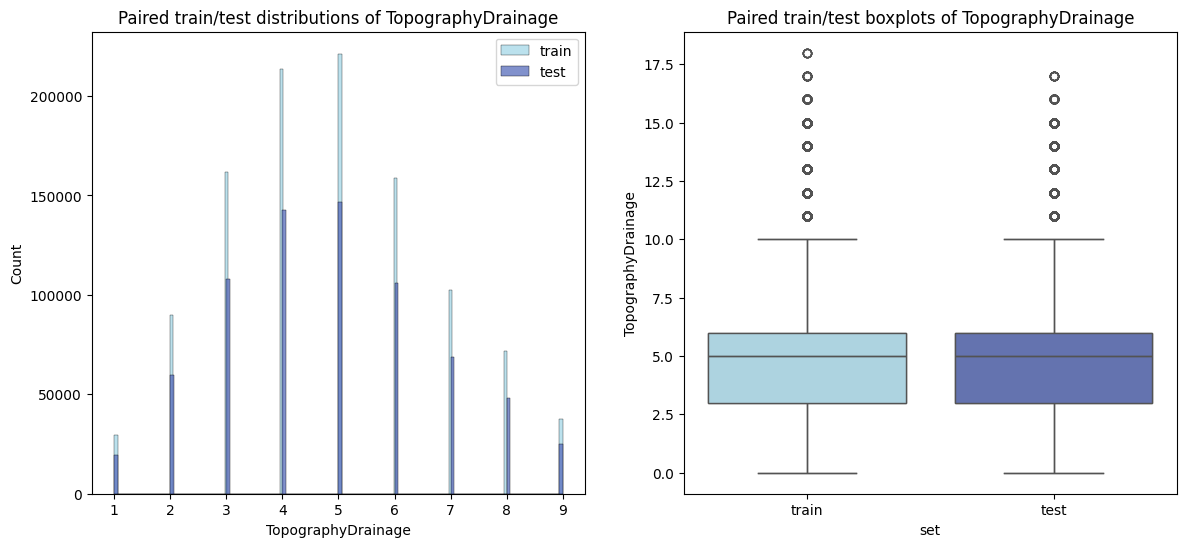

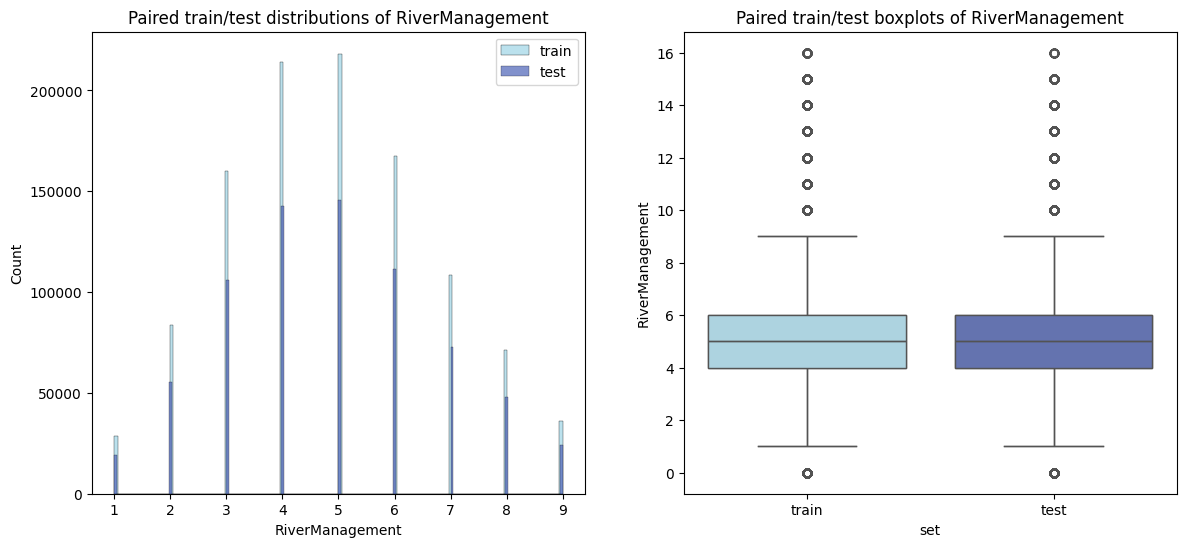

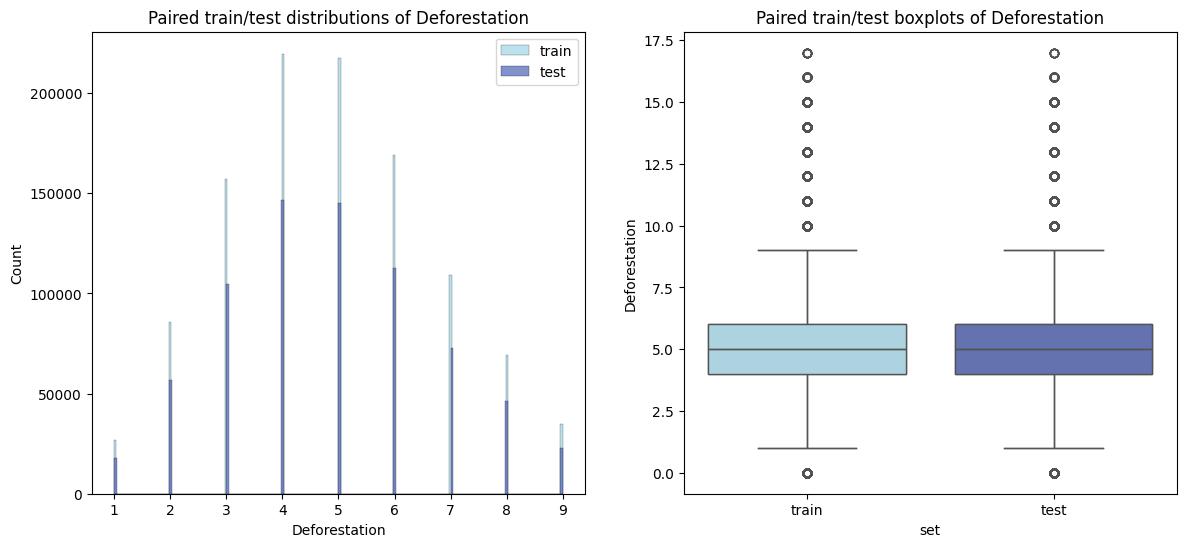

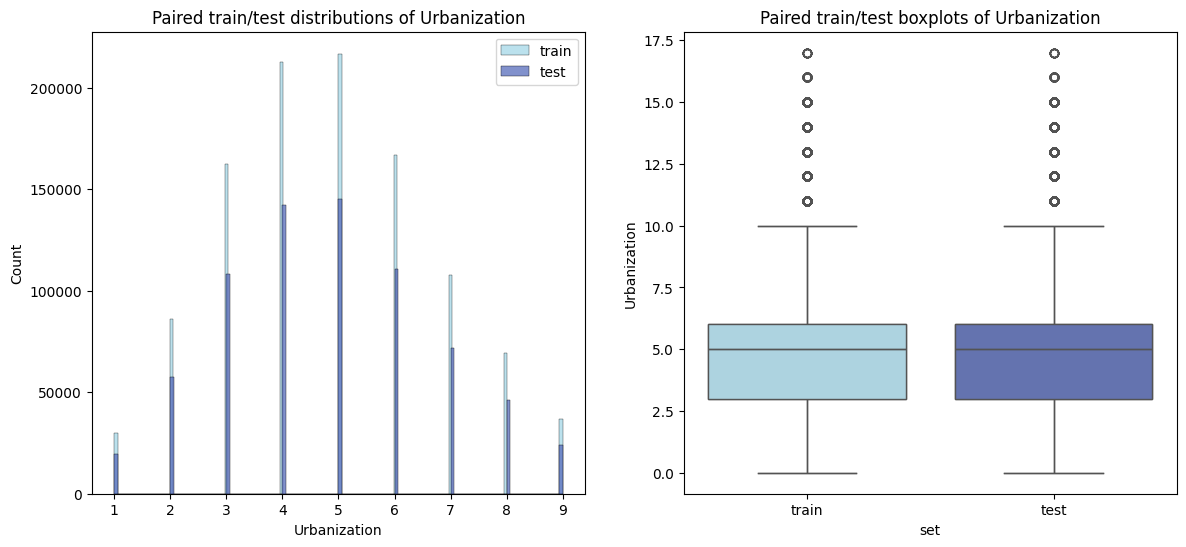

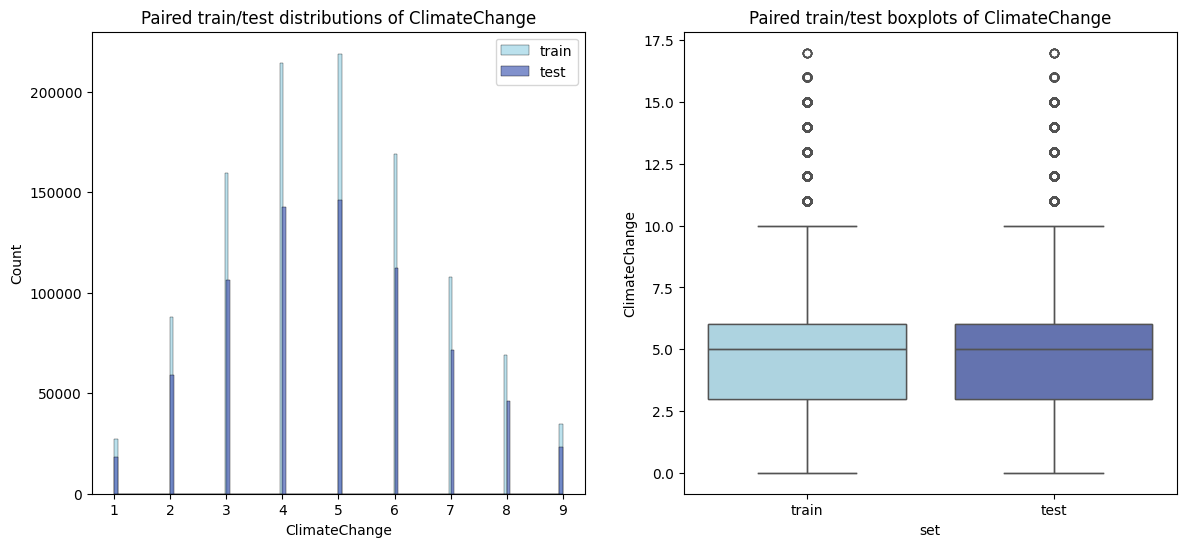

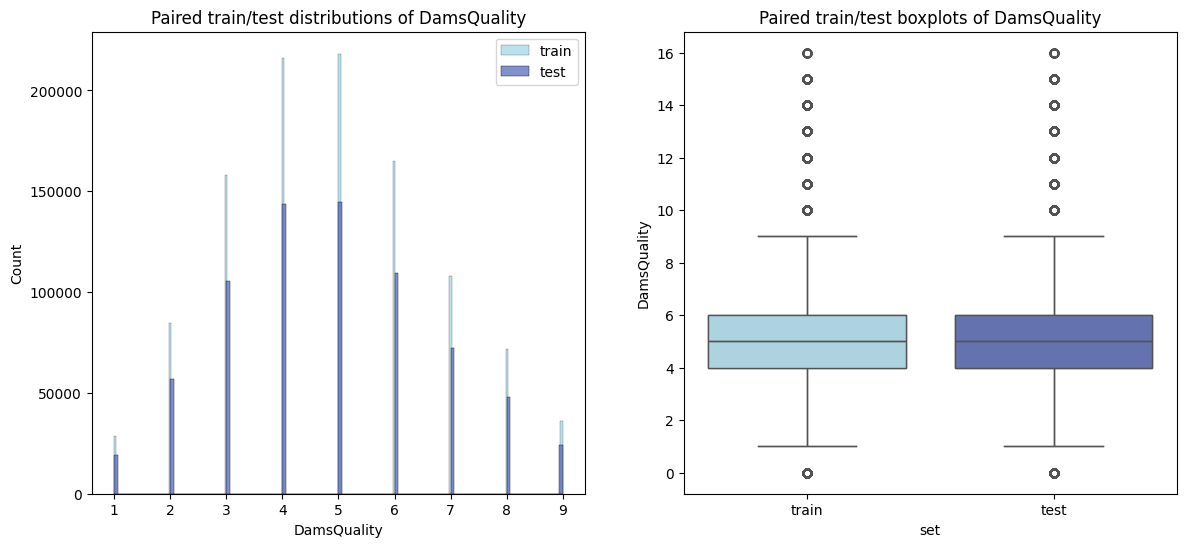

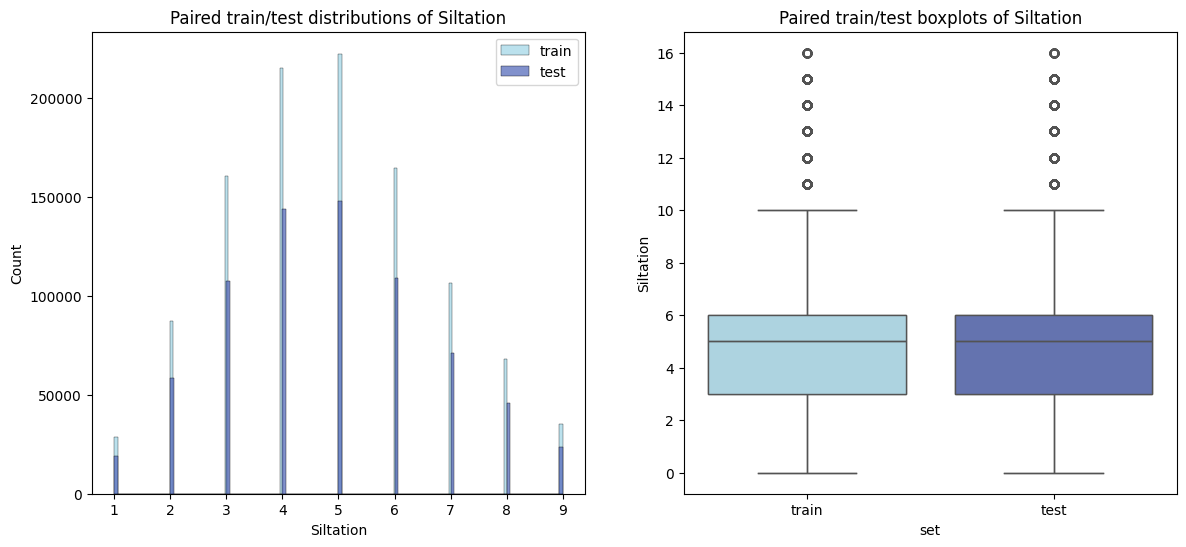

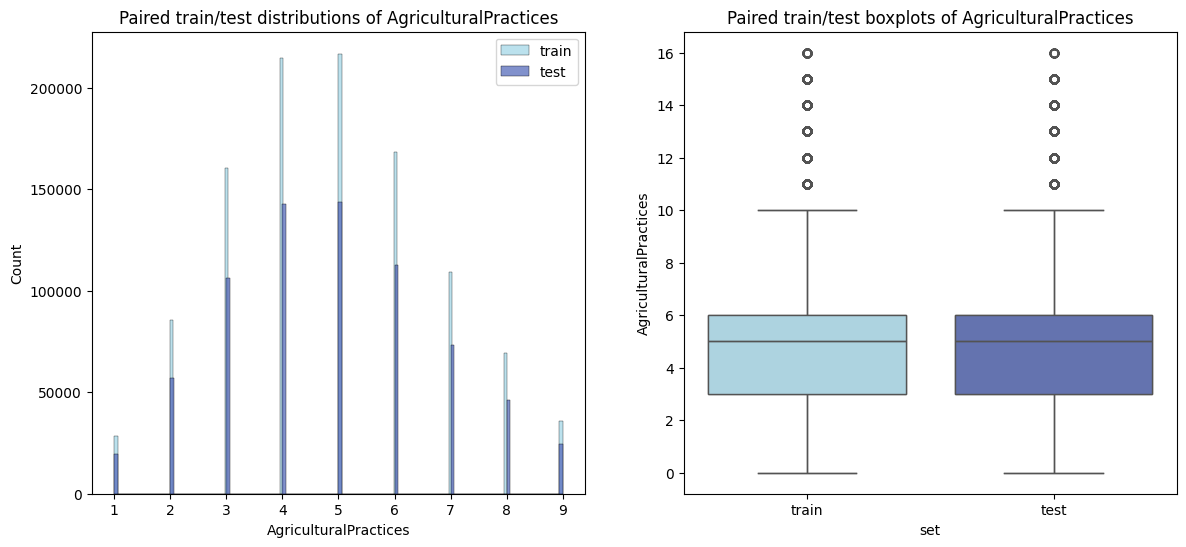

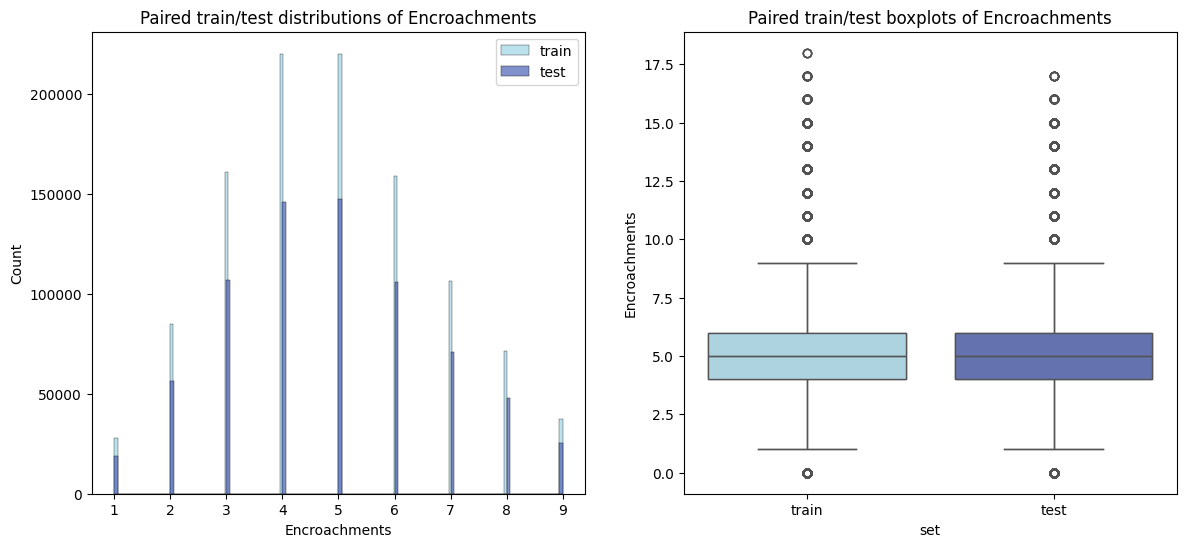

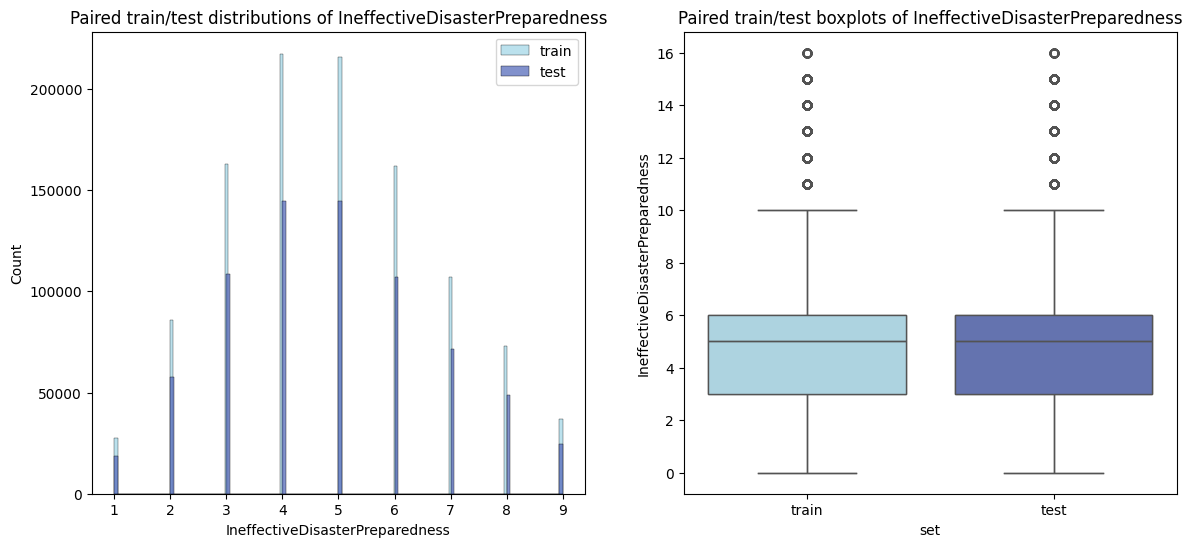

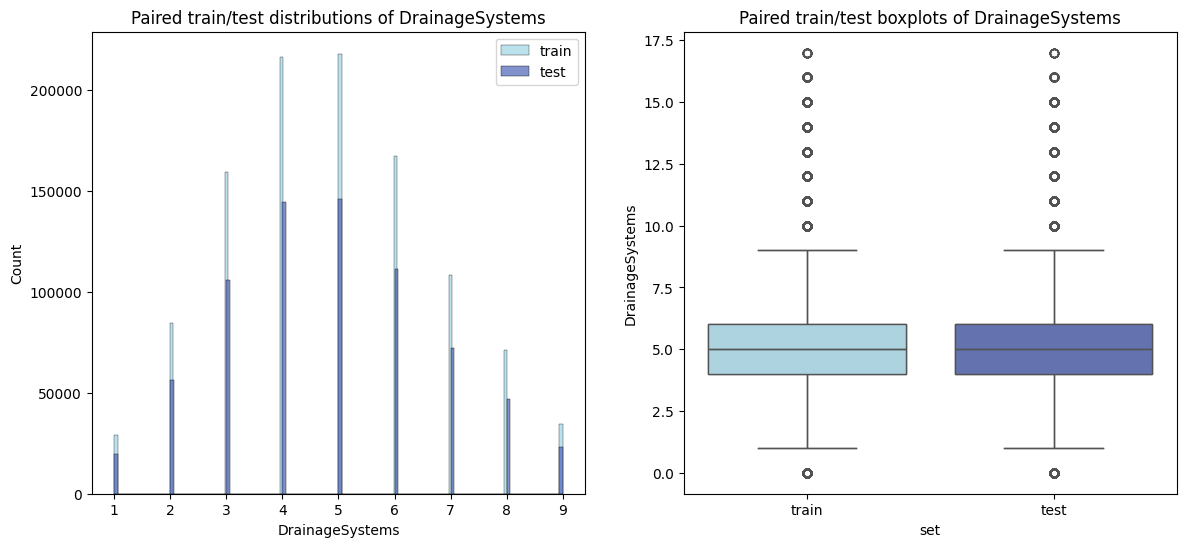

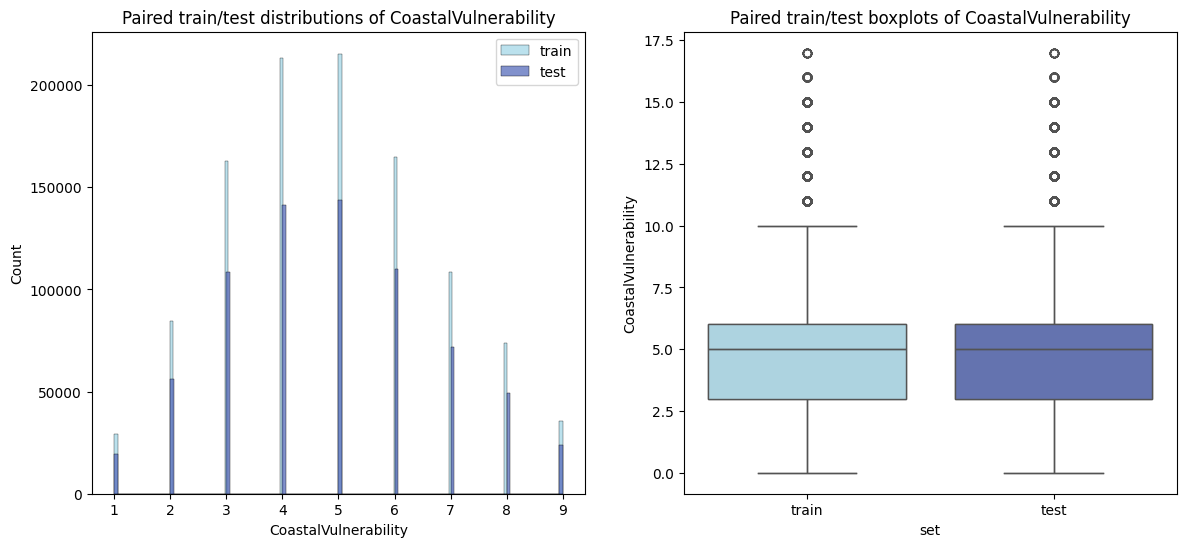

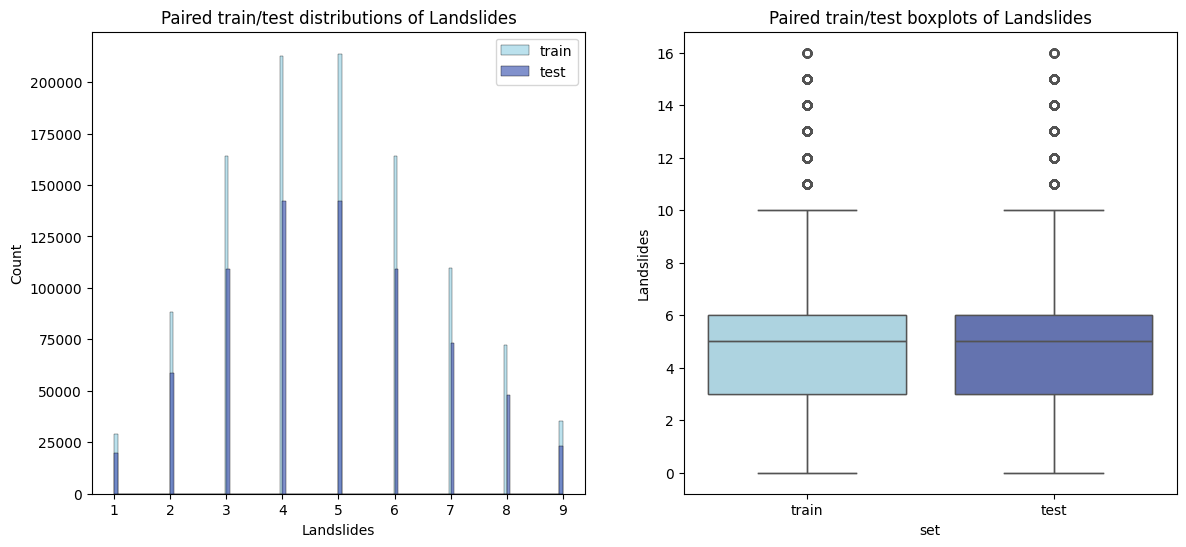

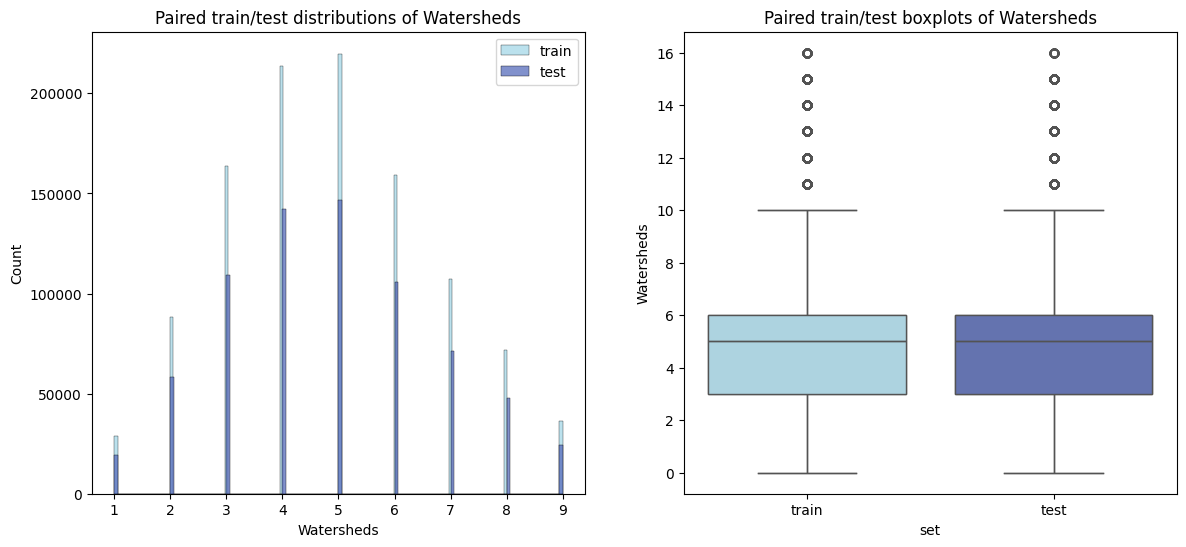

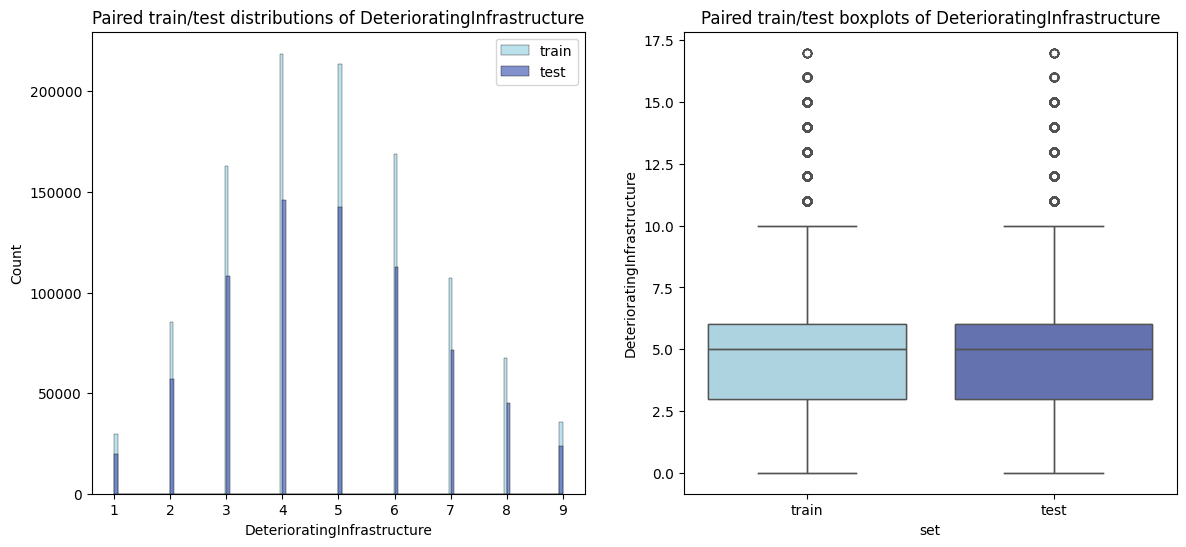

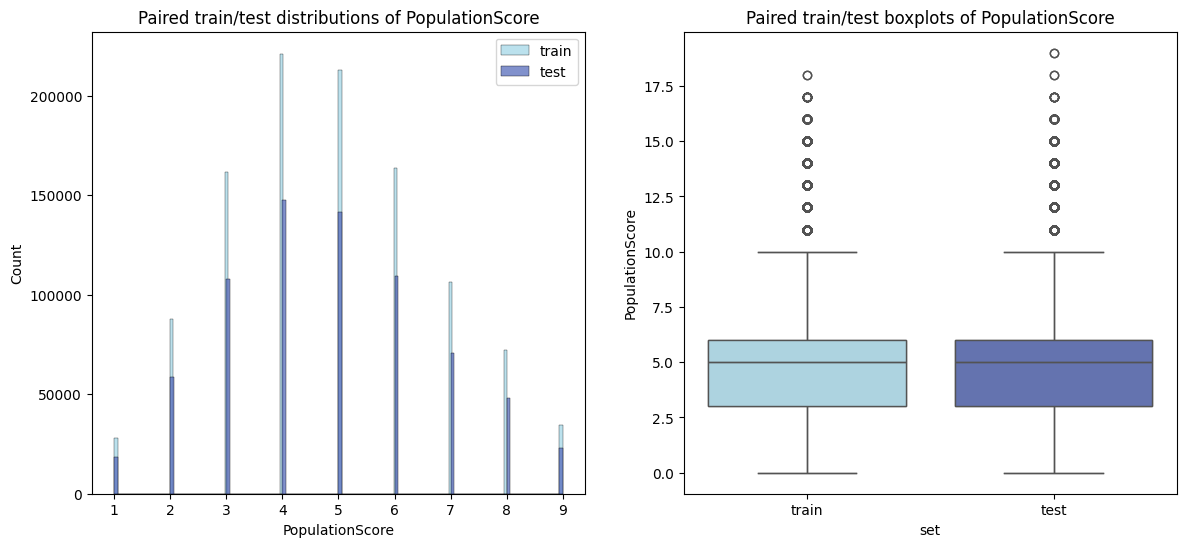

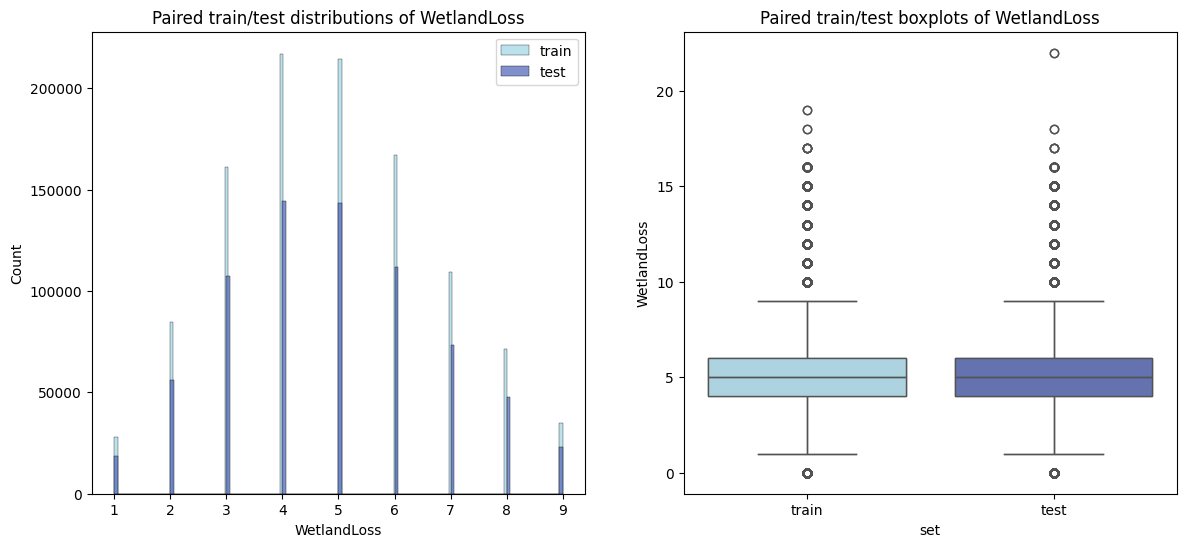

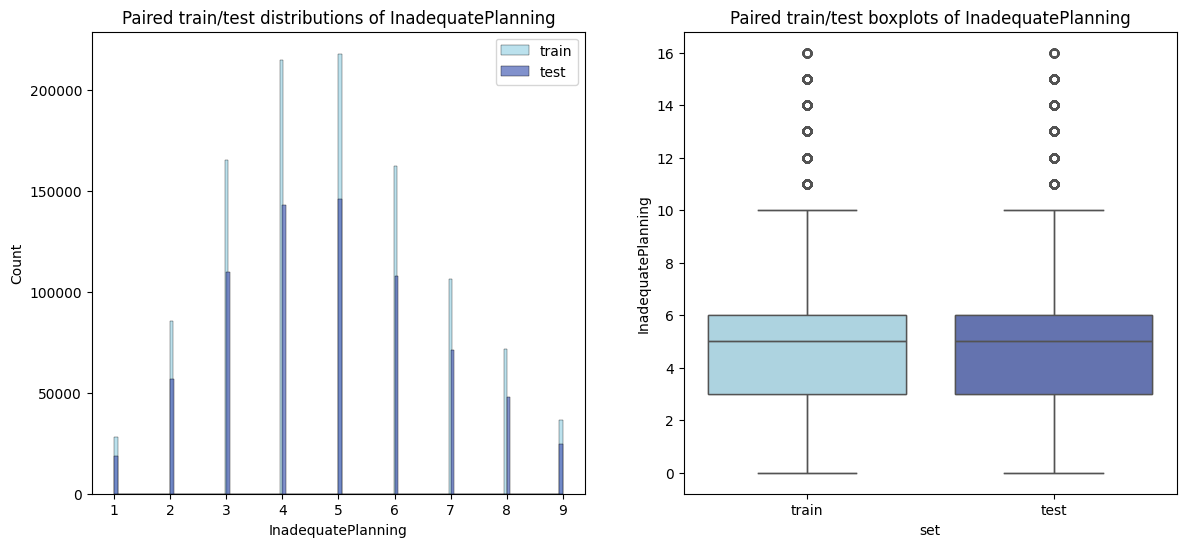

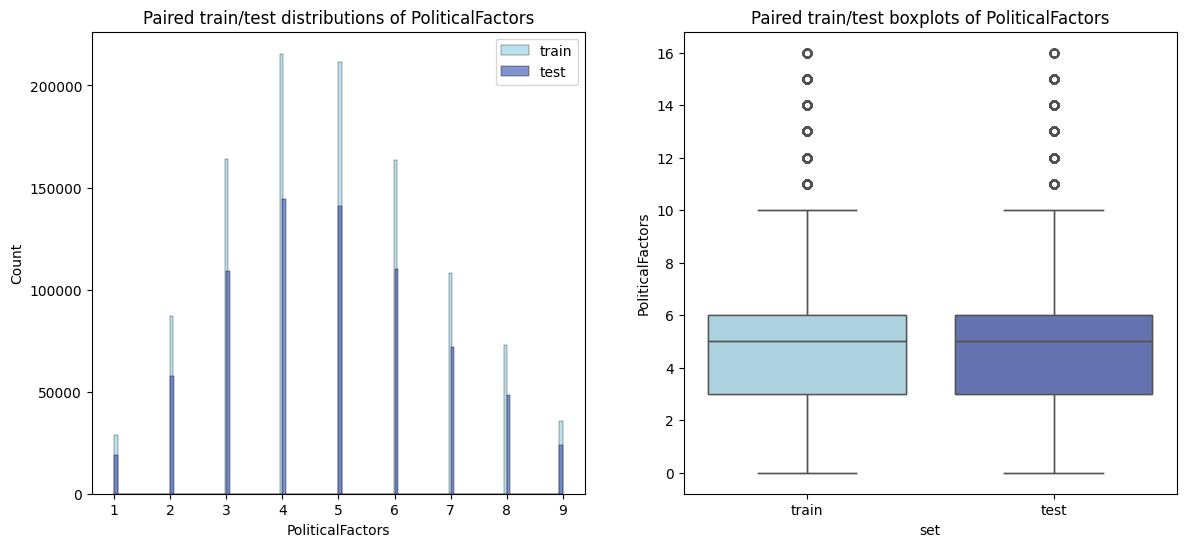

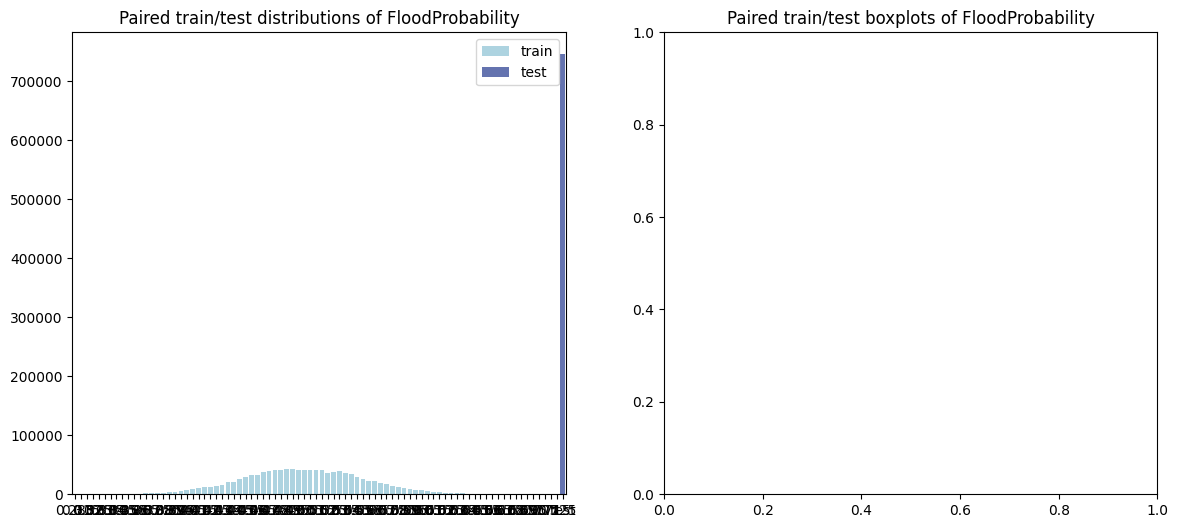

In [15]:
def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df[hue] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, axes = plt.subplots(1, 2, figsize=(14, 6))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        # Filter 'selection' to include only the central 95% of the data
        if selection.dtype.name != "object":
            q_025, q_975 = np.percentile(selection, [2.5, 97.5])
            selection_filtered = selection[(selection >= q_025) & (selection <= q_975)]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            warnings.simplefilter("ignore", category=UserWarning)
            if data_df[feature].dtype.name == "object":
                sns.barplot(x=selection.value_counts().index.to_list(), y=selection.value_counts().values, color=palette[i], ax=axes[0], label=s)
                # plt.pie(data_df[[feature, "set"]].value_counts().values, labels=data_df[[feature, "set"]].value_counts().index, autopct='%1.1f%%', colors=palette, startangle=90, counterclock=False)
                sns.boxplot(x=hue, y=feature, data=pd.DataFrame({hue: [], feature: []}), palette=palette, ax=axes[1])
            else:
                sns.histplot(selection_filtered, color=palette[i], ax=axes[0], label=s)
                sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
    axes[0].set_title(f"Paired train/test distributions of {feature}")
    if data_df[feature].dtype.name != "object":
        axes[1].set_title(f"Paired train/test boxplots of {feature}")
    else:
        # axes[1].set_title(f"Paired train/test pie charts of {feature}")
        axes[1].set_title(f"Paired train/test boxplots of {feature}")
    axes[0].legend()
    #axes[1].legend()
    plt.show()

color_list = ["#A5D7E8", "#576CBC", "#10376D", "#003447"]
for feature in train.columns:
    plot_distribution_pairs(train, test, feature, palette=color_list)

<Axes: >

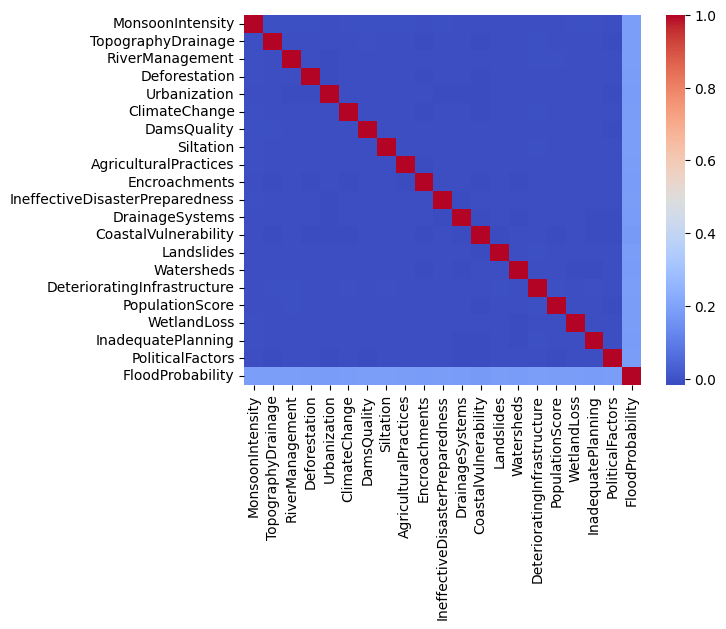

In [21]:
sns.heatmap(train.drop("id", axis=1).corr(), annot=False, fmt=".2f", cmap="coolwarm")

<Axes: >

c:\Users\ivan.trujillo_blueta\proyectos\personal\flood_prediction\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\ivan.trujillo_blueta\proyectos\personal\flood_prediction\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


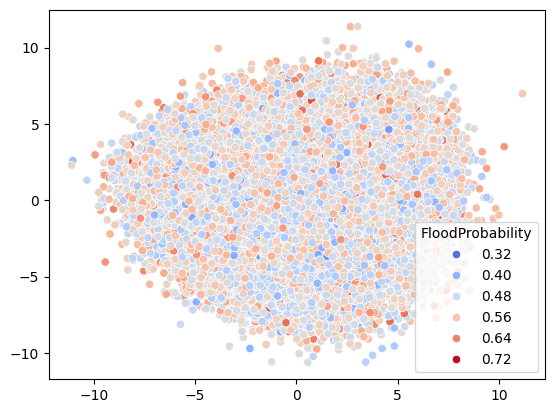

In [24]:
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train.drop("id", axis=1))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=train["FloodProbability"], palette="coolwarm")

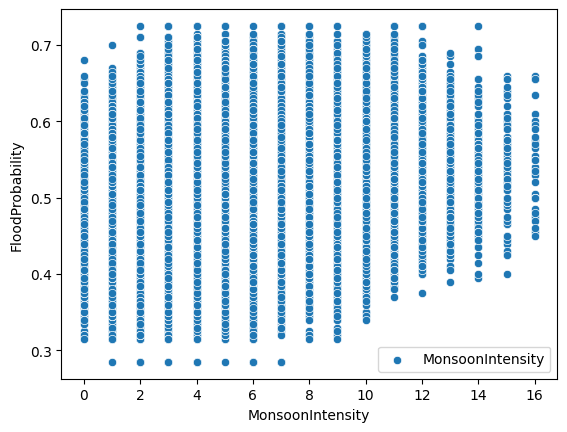

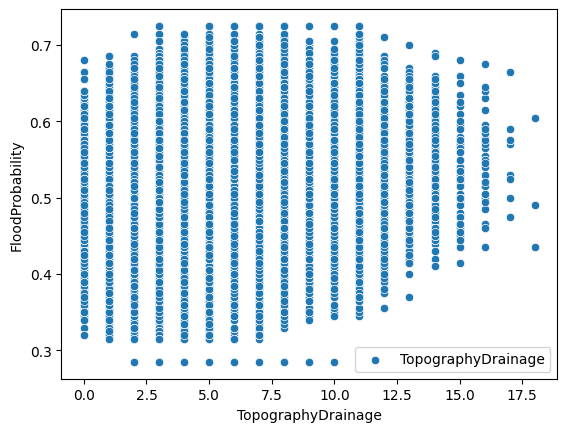

c:\Users\ivan.trujillo_blueta\proyectos\personal\flood_prediction\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


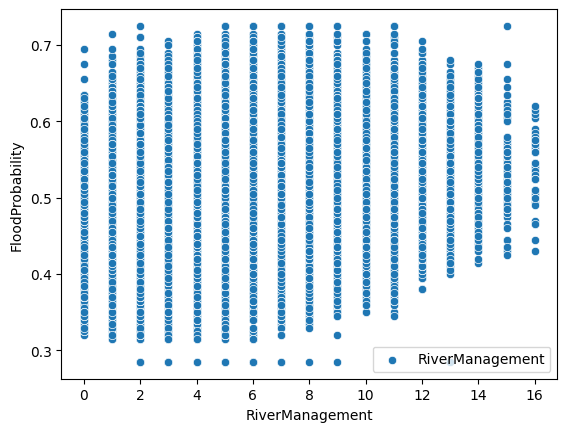

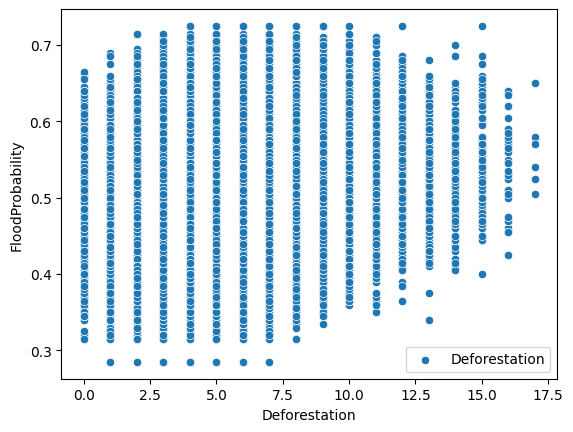

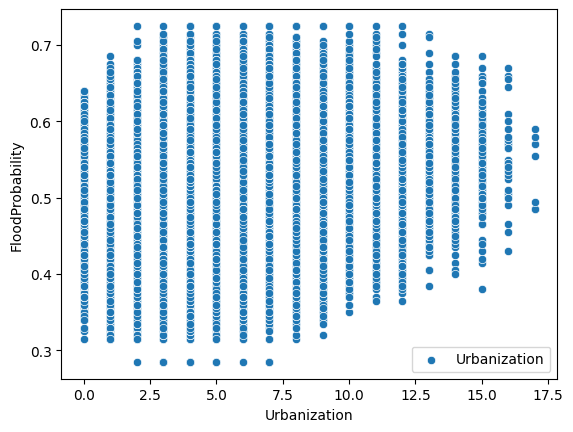

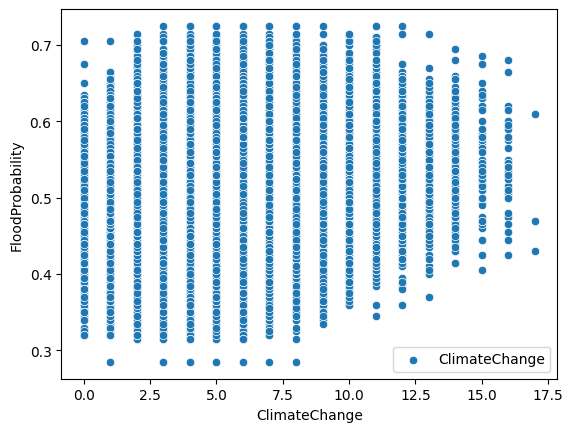

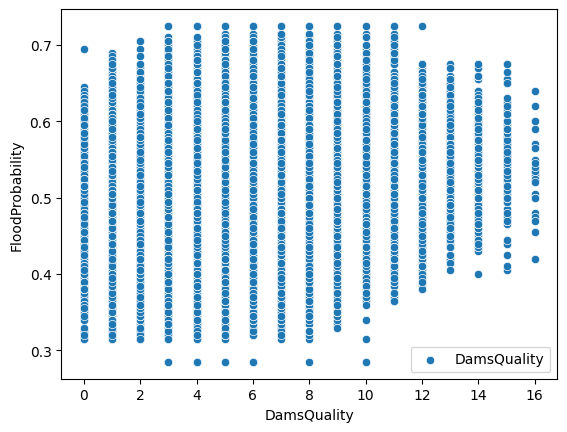

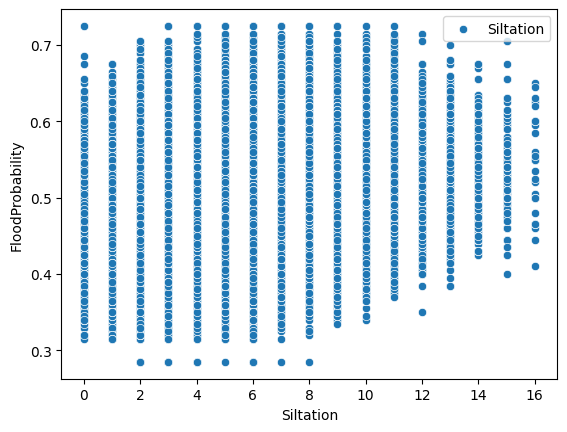

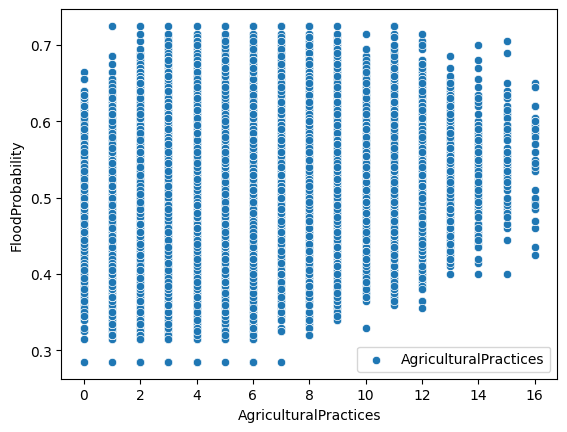

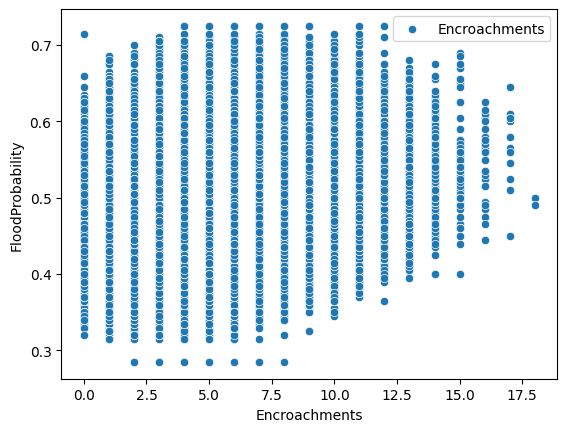

c:\Users\ivan.trujillo_blueta\proyectos\personal\flood_prediction\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


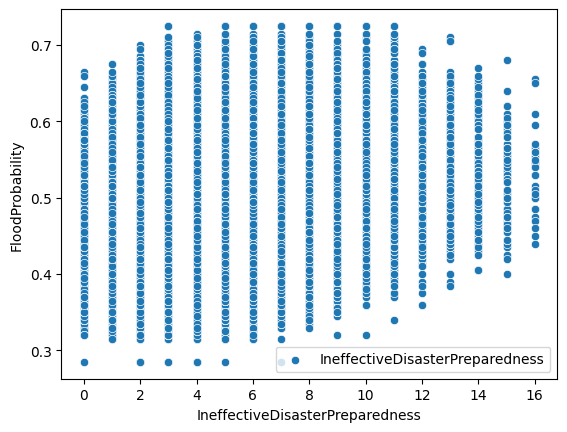

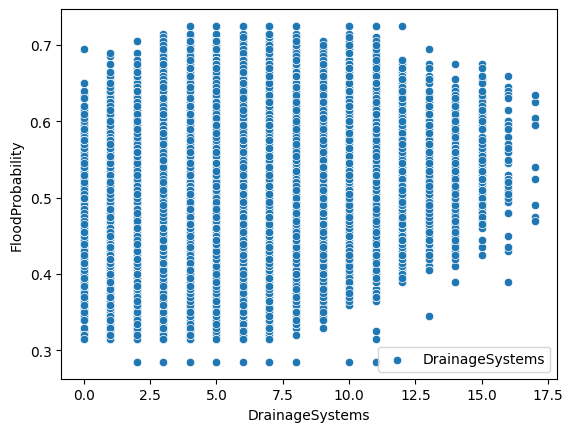

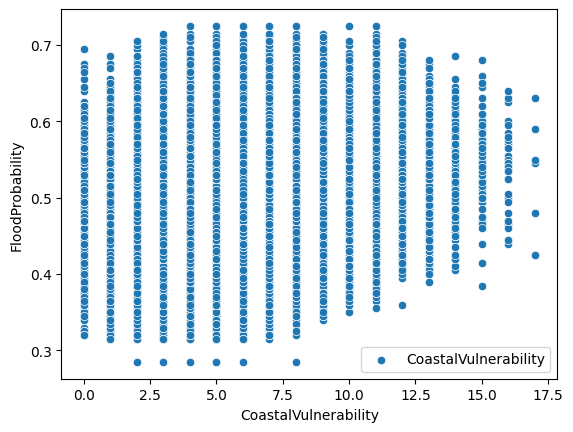

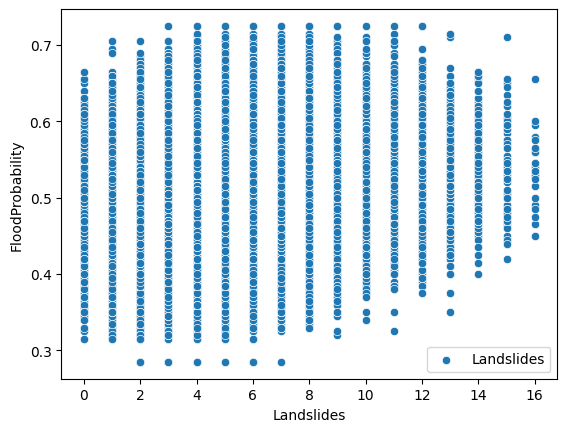

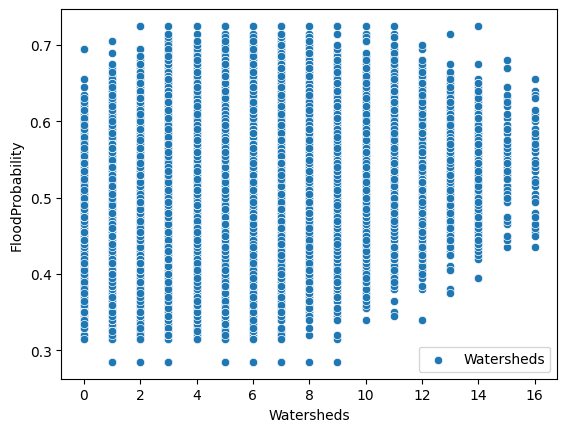

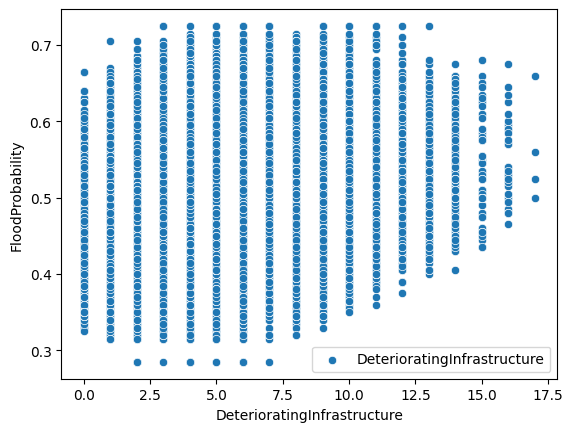

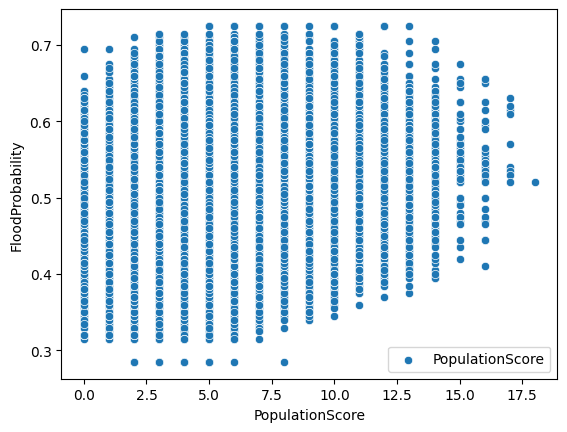

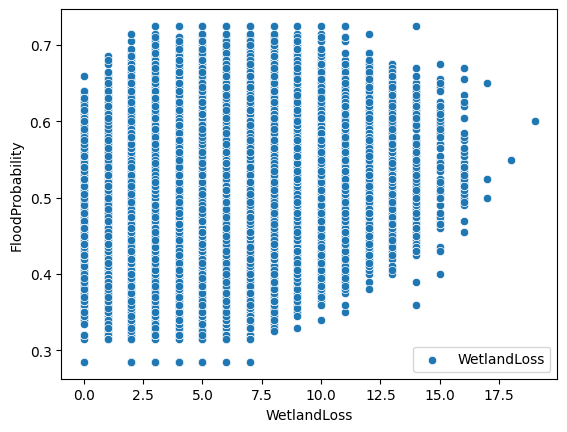

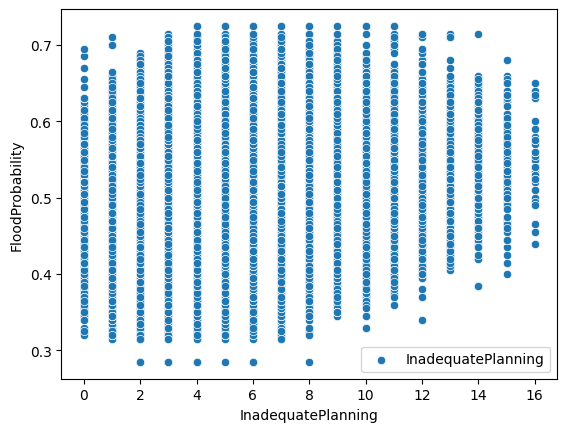

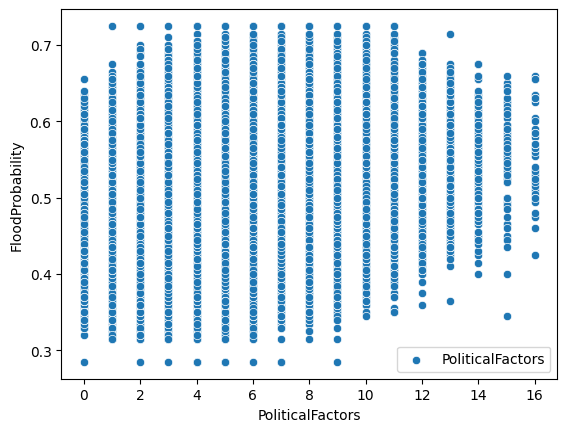

In [29]:
for col in train.drop(["id", "FloodProbability"], axis=1).columns:
    sns.scatterplot(x=col, y="FloodProbability", data=train, label=col)
    plt.show()

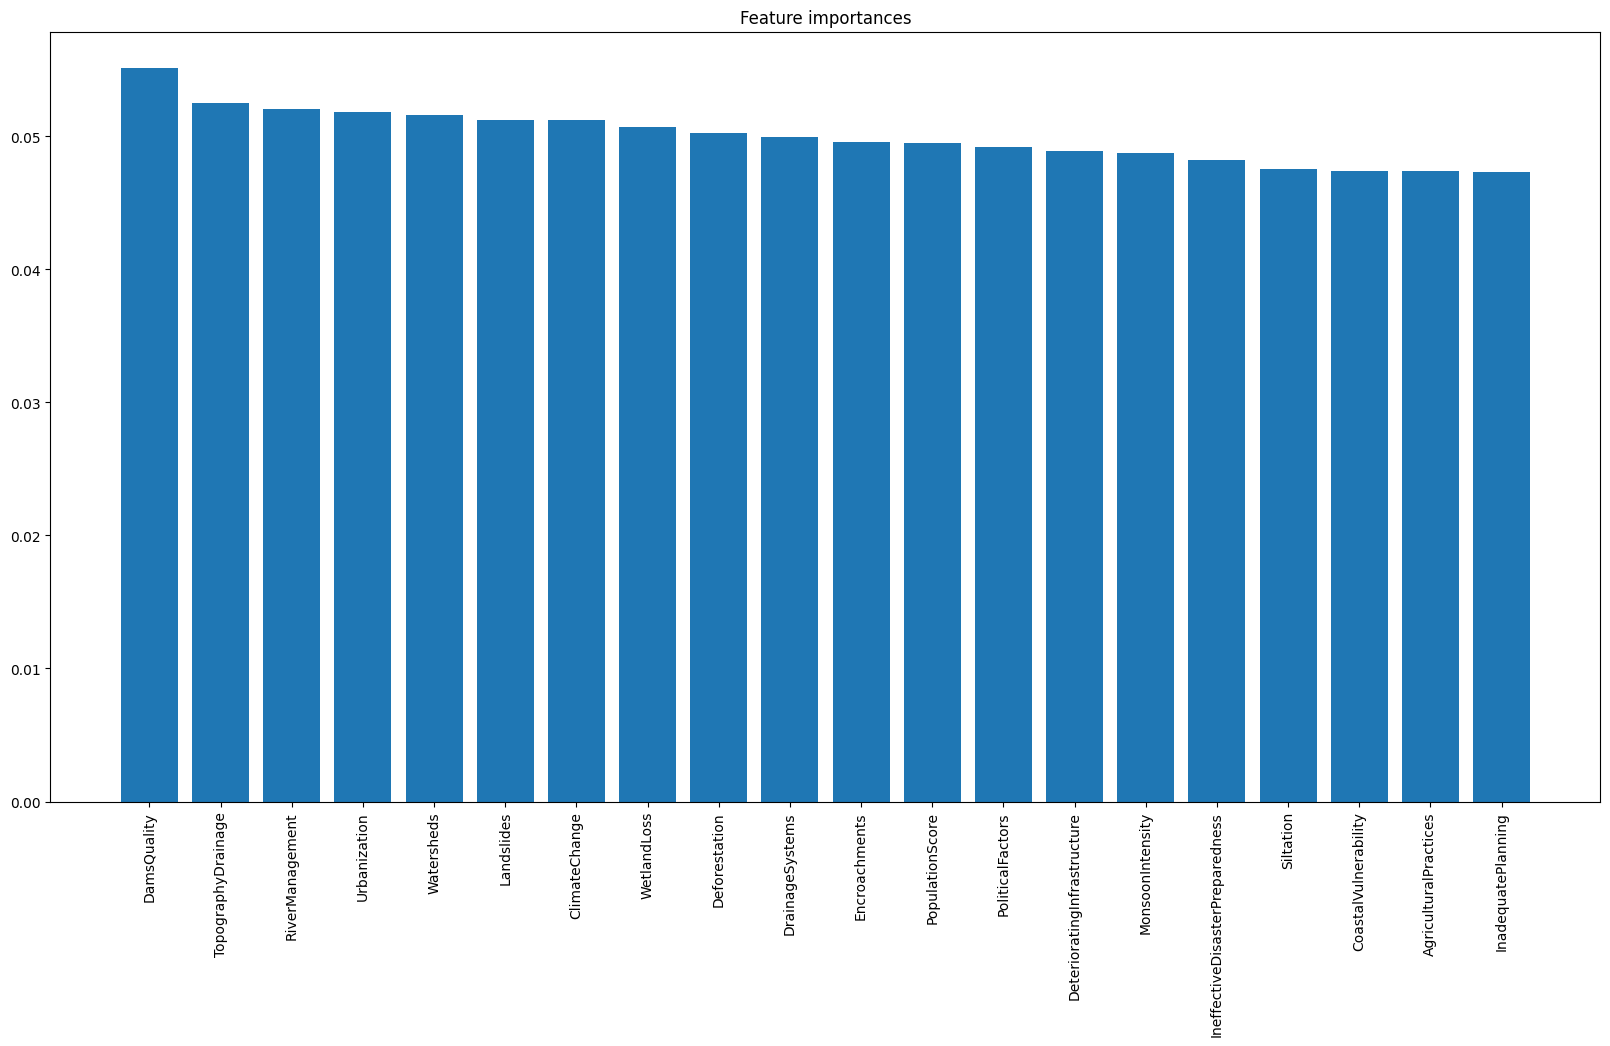

In [33]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
sample_train = train.drop(["id"], axis=1).sample(10000, random_state=42)
random_forest.fit(sample_train.drop(["FloodProbability"], axis=1), sample_train["FloodProbability"])
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(train.drop(["id", "FloodProbability"], axis=1).columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

In [34]:
train.shape, train.drop_duplicates().shape

((1117957, 22), (1117957, 22))

In [3]:
train = train.drop("id", axis=1)

In [4]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [5]:
target_name = "FloodProbability"

In [17]:
run_optimization = False

def objective(trial):

    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'gamma' : trial.suggest_float('gamma', 1e-9, 0.5),
        'max_depth': trial.suggest_int('max_depth', 0, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 100.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 100.0, log=True),
        
    }
    
    params['booster'] = 'gbtree'
    params['objective'] = 'reg:squarederror'
    params["device"] = "cuda"
    params["verbosity"] = 0
    params['tree_method'] = "hist"

    cv_splits = cv.split(train.drop(target_name, axis=1), y=train[target_name])
    cv_scores = list()

    for train_idx, val_idx in cv_splits:
    
        xgb_model = xgb.XGBRegressor(**params)

        X_train_fold, X_val_fold = train.drop(target_name, axis=1).iloc[train_idx], train.drop(target_name, axis=1).iloc[val_idx]
        target = train[target_name].to_numpy()
        y_train_fold, y_val_fold = target[train_idx], target[val_idx]

        xgb_model.fit(X_train_fold, y_train_fold)

        y_val_pred = xgb_model.predict(X_val_fold)
        cv_scores.append(r2_score(y_val_fold, y_val_pred))

    cv_evaluation = np.mean(cv_scores)
    
    return cv_evaluation

if run_optimization:
    
    sqlite_db = "sqlite:///sqlite.db"
    study_name = "flood_prediction_xgb"
    xgb_study = optuna.create_study(storage=sqlite_db, study_name=study_name, 
                                sampler=TPESampler(n_startup_trials=10, seed=0),
                                direction="maximize", load_if_exists=True)

    xgb_study.optimize(objective, n_trials=100)
    best_xgb_params = xgb_study.best_params
    best_xgb_value = xgb_study.best_value

else:
    
    best_xgb_value = 0.83871
    best_xgb_params = {
        'learning_rate': 0.09426995417747965, 
        'gamma': 0.0002506541342361451, 
        'max_depth': 8, 
        'min_child_weight': 5, 
        'subsample': 0.926004343435505, 
        'colsample_bytree': 0.3021760360618963, 
        'grow_policy': 'depthwise', 
        'n_estimators': 465, 
        'reg_lambda': 0.11368407171684974, 
        'reg_alpha': 4.4241496613698785e-07
    }

print(f"best optmized accuracy: {best_xgb_value:0.5f}")
print(f"best hyperparameters: {best_xgb_params}")

best_xgb_params['booster'] = 'gbtree'
best_xgb_params['objective'] = 'reg:squarederror'
best_xgb_params['tree_method'] = "hist"
best_xgb_params["device"] = "cuda"
best_xgb_params["verbosity"] = 0

best optmized accuracy: 0.83871
best hyperparameters: {'learning_rate': 0.09426995417747965, 'gamma': 0.0002506541342361451, 'max_depth': 8, 'min_child_weight': 5, 'subsample': 0.926004343435505, 'colsample_bytree': 0.3021760360618963, 'grow_policy': 'depthwise', 'n_estimators': 465, 'reg_lambda': 0.11368407171684974, 'reg_alpha': 4.4241496613698785e-07}


In [26]:
run_optimization = False

def objective(trial):
    
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'depth': trial.suggest_int('depth', 0, 12),
        'l2_leaf_reg' : trial.suggest_float('l2_leaf_reg', 1e-9, 0.5),
        # On GPU grow policy Lossguide can't be used with ordered boosting
        'grow_policy': trial.suggest_categorical('grow_policy', ["Depthwise", "Lossguide", "SymmetricTree"]),
        # 'grow_policy': trial.suggest_categorical('grow_policy1', ["Depthwise", "SymmetricTree"]),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 10),
        # rsm on GPU is supported for pairwise modes only
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.01, 0.1, log=True),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
    }

    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0.0, 10.0)
    elif params["bootstrap_type"] == "Bernoulli":
        params["subsample"] = trial.suggest_float("subsample", 0.1, 1.0, log=True)
    
    params['objective'] = 'RMSE'
    # params["task_type"] = "GPU"
    params["task_type"] = "CPU"
    params["devices"] = "0"
    params["verbose"] = 0

    cv_splits = cv.split(train.drop(target_name, axis=1), y=train[target_name])
    cv_scores = list()

    for train_idx, val_idx in cv_splits:
        gbm = cb.CatBoostRegressor(**params)

        X_train_fold, X_val_fold = train.drop(target_name, axis=1).iloc[train_idx], train.drop(target_name, axis=1).iloc[val_idx]
        target = train[target_name].to_numpy()
        y_train_fold, y_val_fold = target[train_idx], target[val_idx]

        # callbacks are not supported for GPU
        # pruning_callback = CatBoostPruningCallback(trial, "RMSE")
        gbm.fit(
            X_train_fold,
            y_train_fold,
            eval_set=[(X_val_fold, y_val_fold)],
            verbose=0,
            early_stopping_rounds=100,
            # callbacks=[pruning_callback],
        )

        # evoke pruning manually.
        # pruning_callback.check_pruned()

        preds = gbm.predict(X_val_fold)
        r2 = r2_score(y_val_fold, preds)
        cv_scores.append(r2)
    
    return np.mean(cv_scores)

if run_optimization:
    
    sqlite_db = "sqlite:///sqlite.db"
    study_name = "flood_prediction_cb"
    cb_study = optuna.create_study(storage=sqlite_db, study_name=study_name, 
                                sampler=TPESampler(n_startup_trials=10, seed=0),
                                direction="maximize", load_if_exists=True,
                                # pruner=optuna.pruners.MedianPruner(n_warmup_steps=5)
                                )

    cb_study.optimize(objective, n_trials=100)
    best_cb_params = cb_study.best_params
    best_cb_value = cb_study.best_value

else:
    
    best_cb_value = 0.84660
    best_cb_params = {
        'iterations': 594, 
        'learning_rate': 0.269388301928541, 
        'depth': 7, 
        'l2_leaf_reg': 0.27244159195356527, 
        'grow_policy': "SymmetricTree", 
        'min_child_samples': 5, 
        # 'colsample_bylevel': 2, 
        'boosting_type': "Plain", 
        'bootstrap_type': "Bernoulli",
        'subsample': 0.36986612821028797,
    }

print(f"best optmized accuracy: {best_cb_value:0.5f}")
print(f"best hyperparameters: {best_cb_params}")

best_cb_params['objective'] = 'RMSE'
# best_cb_params["task_type"] = "GPU"
best_cb_params["task_type"] = "CPU"
best_cb_params["devices"] = "0"

best optmized accuracy: 0.84660
best hyperparameters: {'iterations': 594, 'learning_rate': 0.269388301928541, 'depth': 7, 'l2_leaf_reg': 0.27244159195356527, 'grow_policy': 'SymmetricTree', 'min_child_samples': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.36986612821028797}


In [8]:
optuna.visualization.plot_optimization_history(cb_study)

In [9]:
optuna.visualization.plot_parallel_coordinate(cb_study)

[W 2024-05-08 13:42:50,803] Your study has only completed trials with missing parameters.


In [10]:
optuna.visualization.plot_slice(cb_study)

In [13]:
run_optimization = False

def objective(trial):
    
    params = {
        "objective": "regression",
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    train_x, valid_x, train_y, valid_y = train_test_split(train.drop(target_name, axis=1), train[target_name], test_size=0.2)
    dtrain = lgb.Dataset(train_x, label=train_y)
    dvalid = lgb.Dataset(valid_x, label=valid_y)

    # pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "rmse")
    lgb_model = lgb.train(
        params,
        dtrain,
        valid_sets=[dvalid],
        # callbacks=[pruning_callback]
        )

    preds = lgb_model.predict(valid_x)
    r2 = r2_score(valid_y, preds)
    
    return r2

if run_optimization:
    
    sqlite_db = "sqlite:///sqlite.db"
    study_name = "flood_prediction_lgb"
    lgb_study = optuna.create_study(storage=sqlite_db, study_name=study_name, 
                                sampler=TPESampler(n_startup_trials=10, seed=0),
                                direction="maximize", load_if_exists=True,
                                # pruner=optuna.pruners.MedianPruner(n_warmup_steps=10)
                                )

    lgb_study.optimize(objective, n_trials=100)
    best_lgb_params = lgb_study.best_params
    best_lgb_value = lgb_study.best_value

else:
    
    best_lgb_value = 0.81829
    best_lgb_params = {
        'objective': "regression",
        'metric': "rmse",
        'verbosity': -1,
        "boosting_type": "gbdt",
        'lambda_l1': 0.00013860291018044987,
        'lambda_l2': 4.4223849901140136e-07, 
        'num_leaves': 249, 
        'feature_fraction': 0.4789891962955498, 
        'bagging_fraction': 0.445750132584805, 
        'bagging_freq': 2, 
        'min_child_samples': 69,
    }

print(f"best optmized accuracy: {best_lgb_value:0.5f}")
print(f"best hyperparameters: {best_lgb_params}")

[I 2024-05-08 14:06:02,654] Using an existing study with name 'flood_prediction_lgb' instead of creating a new one.
[I 2024-05-08 14:06:08,340] Trial 3 finished with value: 0.8093126530978044 and parameters: {'lambda_l1': 0.0008696040132105586, 'lambda_l2': 0.027334069690310565, 'num_leaves': 155, 'feature_fraction': 0.7269299097981381, 'bagging_fraction': 0.6541928796033428, 'bagging_freq': 5, 'min_child_samples': 47}. Best is trial 3 with value: 0.8093126530978044.
[I 2024-05-08 14:06:13,950] Trial 4 finished with value: 0.8009128375951503 and parameters: {'lambda_l1': 1.0615904599004014, 'lambda_l2': 4.709392030276881, 'num_leaves': 99, 'feature_fraction': 0.8750350228495988, 'bagging_fraction': 0.7173369518517427, 'bagging_freq': 4, 'min_child_samples': 93}. Best is trial 3 with value: 0.8093126530978044.
[I 2024-05-08 14:06:17,375] Trial 5 finished with value: 0.6300150445472621 and parameters: {'lambda_l1': 4.3583742877412676e-08, 'lambda_l2': 6.083642669826052e-08, 'num_leaves':

best optmized accuracy: 0.81829
best hyperparameters: {'lambda_l1': 0.00013860291018044987, 'lambda_l2': 4.4223849901140136e-07, 'num_leaves': 249, 'feature_fraction': 0.4789891962955498, 'bagging_fraction': 0.445750132584805, 'bagging_freq': 2, 'min_child_samples': 69}


In [39]:
stacking_model = StackingRegressor(
    estimators=[('xgb', xgb.XGBRegressor(**best_xgb_params)), ('cb', cb.CatBoostRegressor(**best_cb_params)), ('lgb', lgb.LGBMRegressor(**best_lgb_params))],
    final_estimator=LinearRegression()
)

In [40]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [41]:
cv_scores = list()
for train_idx, val_idx in cv.split(train.drop(target_name, axis=1), y=train[target_name]):
    X_train_fold, X_val_fold = train.drop(target_name, axis=1).iloc[train_idx], train.drop(target_name, axis=1).iloc[val_idx]
    target = train[target_name].to_numpy()
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]
    
    stacking_model.fit(X_train_fold, y_train_fold)
    y_val_pred = stacking_model.predict(X_val_fold)
    cv_scores.append(r2_score(y_val_fold, y_val_pred))

0:	learn: 0.0489338	total: 56.6ms	remaining: 33.6s
1:	learn: 0.0467594	total: 112ms	remaining: 33.2s
2:	learn: 0.0446323	total: 162ms	remaining: 31.8s
3:	learn: 0.0430511	total: 209ms	remaining: 30.8s
4:	learn: 0.0414005	total: 258ms	remaining: 30.4s
5:	learn: 0.0398618	total: 312ms	remaining: 30.5s
6:	learn: 0.0386627	total: 372ms	remaining: 31.2s
7:	learn: 0.0374576	total: 432ms	remaining: 31.7s
8:	learn: 0.0363134	total: 483ms	remaining: 31.4s
9:	learn: 0.0352385	total: 543ms	remaining: 31.7s
10:	learn: 0.0341147	total: 600ms	remaining: 31.8s
11:	learn: 0.0332337	total: 650ms	remaining: 31.5s
12:	learn: 0.0325482	total: 700ms	remaining: 31.3s
13:	learn: 0.0318678	total: 754ms	remaining: 31.2s
14:	learn: 0.0312094	total: 807ms	remaining: 31.1s
15:	learn: 0.0305106	total: 851ms	remaining: 30.7s
16:	learn: 0.0298525	total: 902ms	remaining: 30.6s
17:	learn: 0.0292931	total: 961ms	remaining: 30.7s
18:	learn: 0.0287711	total: 1.02s	remaining: 30.8s
19:	learn: 0.0282421	total: 1.07s	remain

In [42]:
np.mean(cv_scores)

0.8466358549025879

In [ ]:
stacking_model = StackingRegressor(
    estimators=[('xgb', xgb.XGBRegressor(**best_xgb_params)), ('cb', cb.CatBoostRegressor(**best_cb_params)), ('lgb', lgb.LGBMRegressor(**best_lgb_params))],
    final_estimator=LinearRegression(),
    cv=10
)

In [33]:
stacking_model.fit(train.drop(target_name, axis=1), train[target_name])

0:	learn: 0.0489368	total: 76.5ms	remaining: 45.4s
1:	learn: 0.0467429	total: 142ms	remaining: 41.9s
2:	learn: 0.0446206	total: 199ms	remaining: 39.3s
3:	learn: 0.0430506	total: 259ms	remaining: 38.2s
4:	learn: 0.0414057	total: 313ms	remaining: 36.9s
5:	learn: 0.0398649	total: 373ms	remaining: 36.6s
6:	learn: 0.0386860	total: 429ms	remaining: 36s
7:	learn: 0.0374730	total: 481ms	remaining: 35.2s
8:	learn: 0.0363315	total: 533ms	remaining: 34.6s
9:	learn: 0.0352540	total: 584ms	remaining: 34.1s
10:	learn: 0.0341452	total: 634ms	remaining: 33.6s
11:	learn: 0.0332476	total: 681ms	remaining: 33s
12:	learn: 0.0325647	total: 729ms	remaining: 32.6s
13:	learn: 0.0319007	total: 776ms	remaining: 32.2s
14:	learn: 0.0312164	total: 829ms	remaining: 32s
15:	learn: 0.0305412	total: 875ms	remaining: 31.6s
16:	learn: 0.0298627	total: 922ms	remaining: 31.3s
17:	learn: 0.0293000	total: 970ms	remaining: 31s
18:	learn: 0.0287932	total: 1.02s	remaining: 31s
19:	learn: 0.0282638	total: 1.07s	remaining: 30.7s

StackingRegressor(cv=10,
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.3021760360618963,
                                            device='cuda',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.0002506541342361451,
                                            grow_policy='depthwise',
                                            importance_...
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('cb',
                               <catboost.core.CatBoostRegressor object at 0x00000222B62DDAF0>),
                              ('lgb',
                               LGBMRegressor(bagging_fraction=0.445750132584805,
                                             bagging_freq=2,
                                             feature_fraction=0.4789891962955498,
                                             lambda_l1=0.00013860291018044987,
                                             lambda_l2=4.4223849901140136e-07,
                                             min_child_samples=69,
                                             num_leaves=249))],
                  final_estimator=LinearRegression())

In [34]:
stacking_preds = stacking_model.predict(train.drop(target_name, axis=1))

[LightGBM] [Warning] feature_fraction is set=0.4789891962955498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4789891962955498
[LightGBM] [Warning] lambda_l1 is set=0.00013860291018044987, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013860291018044987
[LightGBM] [Warning] lambda_l2 is set=4.4223849901140136e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.4223849901140136e-07
[LightGBM] [Warning] bagging_fraction is set=0.445750132584805, subsample=1.0 will be ignored. Current value: bagging_fraction=0.445750132584805
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [35]:
r2_score(train[target_name], stacking_preds)

0.8520921928783467

0.8461314831554089

In [ ]:
0.8520921928783467

In [ ]:
submission = test.copy()

In [ ]:
submission["FloodProbability"] = stacking_model.predict(submission.drop("id", axis=1))

In [47]:
submission = submission[['id', 'FloodProbability']]

In [48]:
submission.to_csv('data/submission.csv', index=False)